# Lending Club Case Study

## Problem Statement
- This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 
- Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 
- If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss.

## Abstract
 Credit risk is something peer-to-peer (P2P) lending investors must carefully consider when making informed investment decisions; it is the risk of default as a result of borrowers failing to make required payments, leading to loss of principal and interest.In this project, we build predicting modelhistorical loan data that help investors quantify credit risks using numpy and pandas libraries predicting whether a given loan will be fully paid or not.

## Import packages are used 

In [80]:
import pandas as pd
import numpy as np
import seaborn as sea
import warnings
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 60)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#ignore warning
def ignore_warn(*args, **kwargs):
    pass

# ignore annoying warning if any
warnings.warn = ignore_warn

## loading the loan data

In [81]:
loan = pd.read_csv('Loan.csv')
loan.shape

(39717, 111)

In [82]:
# Show the first five rows
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,...,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.000,36 months,10.65%,162.870,B,B2,NaN,10+ years,RENT,24000.000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.650,0,Jan-85,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.000,60 months,15.27%,59.830,C,C4,Ryder,< 1 year,RENT,30000.000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.000,0,Apr-99,5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.000,36 months,15.96%,84.330,C,C5,NaN,10+ years,RENT,12252.000,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.720,0,Nov-01,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.000,36 months,13.49%,339.310,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.000,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.000,0,Feb-96,1,35.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.000,60 months,12.69%,67.790,B,B5,University Medical Group,1 year,RENT,80000.000,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.940,0,Jan-96,0,38.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN


In [83]:
#Shape from the original dataset
print('Number of rows   :',loan.shape[0])
print('Number of columns:',loan.shape[1])

Number of rows   : 39717
Number of columns: 111


In [84]:
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

### As per data observation more columns contains all nulls values so that these columns data isn ot useful our analysis so removing

In [85]:
loan.dropna(axis=1,how="all",inplace=True)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.000,36 months,10.65%,162.870,B,B2,NaN,10+ years,RENT,24000.000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.650,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.000,0.000,5863.155,5833.840,5000.000,863.160,0.000,0.000,0.000,Jan-15,171.620,NaN,May-16,0.000,1,INDIVIDUAL,0,0.000,0,0.000,0.000
1,1077430,1314167,2500,2500,2500.000,60 months,15.27%,59.830,C,C4,Ryder,< 1 year,RENT,30000.000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.000,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.000,0.000,1008.710,1008.710,456.460,435.170,0.000,117.080,1.110,Apr-13,119.660,NaN,Sep-13,0.000,1,INDIVIDUAL,0,0.000,0,0.000,0.000
2,1077175,1313524,2400,2400,2400.000,36 months,15.96%,84.330,C,C5,NaN,10+ years,RENT,12252.000,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.720,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.000,0.000,3005.667,3005.670,2400.000,605.670,0.000,0.000,0.000,Jun-14,649.910,NaN,May-16,0.000,1,INDIVIDUAL,0,0.000,0,0.000,0.000
3,1076863,1277178,10000,10000,10000.000,36 months,13.49%,339.310,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.000,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.000,0,Feb-96,1,35.000,NaN,10,0,5598,21%,37,f,0.000,0.000,12231.890,12231.890,10000.000,2214.920,16.970,0.000,0.000,Jan-15,357.480,NaN,Apr-16,0.000,1,INDIVIDUAL,0,0.000,0,0.000,0.000
4,1075358,1311748,3000,3000,3000.000,60 months,12.69%,67.790,B,B5,University Medical Group,1 year,RENT,80000.000,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.940,0,Jan-96,0,38.000,NaN,15,0,27783,53.90%,38,f,524.060,524.060,3513.330,3513.330,2475.940,1037.390,0.000,0.000,0.000,May-16,67.790,Jun-16,May-16,0.000,1,INDIVIDUAL,0,0.000,0,0.000,0.000


### Some columns contains single value;so removing those columns.

In [86]:
loan.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt'], axis = 1, inplace = True)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths
0,1077501,1296599,5000,5000,4975.000,36 months,10.65%,162.870,B,B2,NaN,10+ years,RENT,24000.000,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.650,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,0.000,0.000,5863.155,5833.840,5000.000,863.160,0.000,0.000,0.000,Jan-15,171.620,NaN,May-16,0.000
1,1077430,1314167,2500,2500,2500.000,60 months,15.27%,59.830,C,C4,Ryder,< 1 year,RENT,30000.000,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.000,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,0.000,0.000,1008.710,1008.710,456.460,435.170,0.000,117.080,1.110,Apr-13,119.660,NaN,Sep-13,0.000
2,1077175,1313524,2400,2400,2400.000,36 months,15.96%,84.330,C,C5,NaN,10+ years,RENT,12252.000,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.720,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,0.000,0.000,3005.667,3005.670,2400.000,605.670,0.000,0.000,0.000,Jun-14,649.910,NaN,May-16,0.000
3,1076863,1277178,10000,10000,10000.000,36 months,13.49%,339.310,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.000,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.000,0,Feb-96,1,35.000,NaN,10,0,5598,21%,37,0.000,0.000,12231.890,12231.890,10000.000,2214.920,16.970,0.000,0.000,Jan-15,357.480,NaN,Apr-16,0.000
4,1075358,1311748,3000,3000,3000.000,60 months,12.69%,67.790,B,B5,University Medical Group,1 year,RENT,80000.000,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.940,0,Jan-96,0,38.000,NaN,15,0,27783,53.90%,38,524.060,524.060,3513.330,3513.330,2475.940,1037.390,0.000,0.000,0.000,May-16,67.790,Jun-16,May-16,0.000


In [87]:
loan.shape

(39717, 48)

####  We have around 48 columns out of which some correspond to the post approval of loan
- We are analyzing the user details and the driving factors of loan defaulting before approving loan.
- So we can safely remove the columns / variables corresponding to that scenario.
- Also there are some columns such as "id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state".
- The above features or columns doesnt contribute to the loan defaulting in any way due to irrelevant information. So removing them.
- "desc" has description (text data) which we cannot do anythhing about for now. So removing the column.
- "out_prncp_inv" , "total_pymnt_inv " are useful for investors but not contributing to the loan defaulting analysis. So removing them.
- "funded_amnt" is not needed because we only need info as to how much is funded in actual. As we have "funded_amnt_inv" , we can remove the earlier column.

In [88]:
loan.drop(["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , "chargeoff_within_12_mths", "mths_since_last_delinq", "mths_since_last_record"], axis = 1, inplace = True)

In [89]:
loan.shape

(39717, 21)

In [90]:
loan.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc'],
      dtype='object')

 - we can ignore the current loans because may be need look for fully paid and charged off status. Hence, removing the current loan status records

In [91]:
loan = loan[loan.loan_status != "Current"]
loan.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

### Find the columns which contains missing values

In [92]:
(loan.isna().sum()/len(loan.index))*100

loan_amnt             0.000
funded_amnt_inv       0.000
term                  0.000
int_rate              0.000
installment           0.000
grade                 0.000
sub_grade             0.000
emp_length            2.678
home_ownership        0.000
annual_inc            0.000
verification_status   0.000
issue_d               0.000
loan_status           0.000
purpose               0.000
dti                   0.000
earliest_cr_line      0.000
inq_last_6mths        0.000
open_acc              0.000
pub_rec               0.000
revol_util            0.130
total_acc             0.000
dtype: float64

### Handling Missing values
- As per above data, missing values are "emp_length", "revol_util".
- So before doing that, lets see what kind of data each column has.

In [93]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt_inv      38577 non-null  float64
 2   term                 38577 non-null  object 
 3   int_rate             38577 non-null  object 
 4   installment          38577 non-null  float64
 5   grade                38577 non-null  object 
 6   sub_grade            38577 non-null  object 
 7   emp_length           37544 non-null  object 
 8   home_ownership       38577 non-null  object 
 9   annual_inc           38577 non-null  float64
 10  verification_status  38577 non-null  object 
 11  issue_d              38577 non-null  object 
 12  loan_status          38577 non-null  object 
 13  purpose              38577 non-null  object 
 14  dti                  38577 non-null  float64
 15  earliest_cr_line     38577 non-null 

In [94]:
loan.emp_length.fillna(loan.emp_length.mode()[0], inplace = True)
loan.emp_length.isna().sum()

0

In [95]:
loan.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
loan.revol_util.isna().sum()

0

#### Standardizing the data
- "revol_util" column although described as an object column, it has continous values.
- So we need to standardize the data in this column
- "int_rate" is one such column.
- "emp_length" --> { (< 1 year) is assumed as 0 and 10+ years is assumed as 10 }
- Although the datatype of "term" is arguable to be an integer, there are only two values in the whole column and it might as well be declared a categorical variable.

In [96]:
loan.revol_util = pd.to_numeric(loan.revol_util.apply(lambda x : x.split('%')[0]))

In [97]:
loan.int_rate = pd.to_numeric(loan.int_rate.apply(lambda x : x.split('%')[0]))

In [98]:
loan.emp_length = pd.to_numeric(loan.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))


In [99]:
loan.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.000,36 months,10.650,162.870,B,B2,10,RENT,24000.000,Verified,Dec-11,Fully Paid,credit_card,27.650,Jan-85,1,3,0,83.700,9
1,2500,2500.000,60 months,15.270,59.830,C,C4,0,RENT,30000.000,Source Verified,Dec-11,Charged Off,car,1.000,Apr-99,5,3,0,9.400,4
2,2400,2400.000,36 months,15.960,84.330,C,C5,10,RENT,12252.000,Not Verified,Dec-11,Fully Paid,small_business,8.720,Nov-01,2,2,0,98.500,10
3,10000,10000.000,36 months,13.490,339.310,C,C1,10,RENT,49200.000,Source Verified,Dec-11,Fully Paid,other,20.000,Feb-96,1,10,0,21.000,37
5,5000,5000.000,36 months,7.900,156.460,A,A4,3,RENT,36000.000,Source Verified,Dec-11,Fully Paid,wedding,11.200,Nov-04,3,9,0,28.300,12


### Outlier identification

In [104]:
# make general plots to examine each feature
def plot_var(col_name, full_name, continuous):
    """
    Visualize a variable with/without faceting on the loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True for continuous variables
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(15,3))
    # plot1: counts distribution of the variable
    
    if continuous:  
        sea.distplot(loan.loc[loan[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sea.countplot(loan[col_name], order=sorted(loan[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

          
    # plot2: bar plot of the variable grouped by loan_status
    if continuous:
        sea.boxplot(x=col_name, y='loan_status', data=loan, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by Loan Status')
    else:
        Charged_Off_rates = loan.groupby(col_name)['loan_status'].value_counts(normalize=True)[:,'Charged Off']
        sea.barplot(x=Charged_Off_rates.index, y=Charged_Off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction of Loans Charged Off')
        ax2.set_title('Charged Off Rate by ' + full_name)
        ax2.set_xlabel(full_name)
    
    # plot3: kde plot of the variable gropued by loan_status
    if continuous:  
        facet = sea.FacetGrid(loan, hue = 'loan_status', size=3, aspect=4)
        facet.map(sea.kdeplot, col_name, shade=True)
        #facet.set(xlim=(df[col_name].min(), df[col_name].max()))
        facet.add_legend()  
    else:
        fig = plt.figure(figsize=(12,3))
        sea.countplot(x=col_name, hue='loan_status', data=loan, order=sorted(loan[col_name].unique()) )
     
    plt.tight_layout()

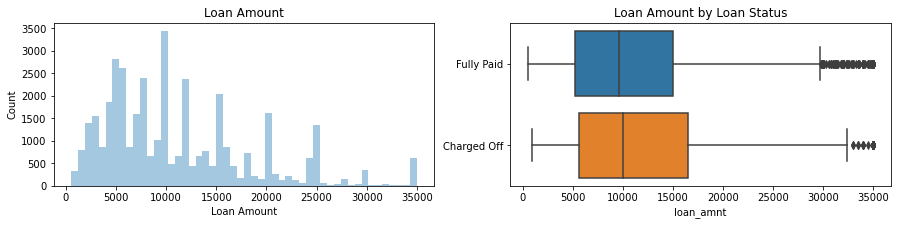

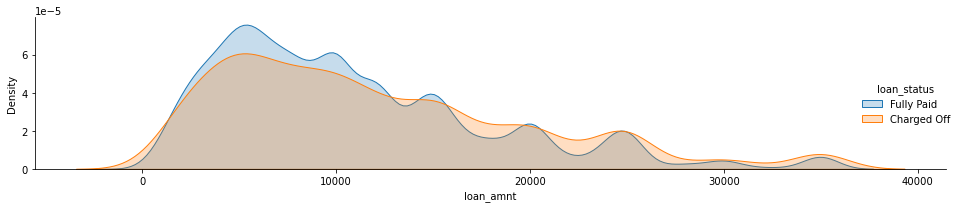

In [105]:
plot_var('loan_amnt', 'Loan Amount', continuous=True)

In [106]:
loan['term'].value_counts(dropna=False)

 36 months    29049
 60 months     9478
Name: term, dtype: int64

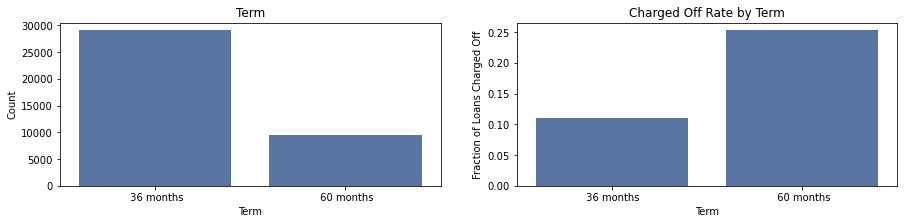

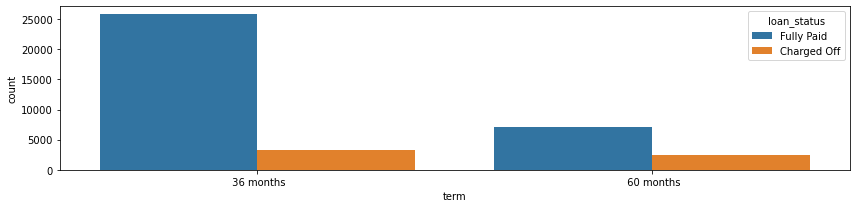

In [108]:
#loan['term'] = loan['term'].apply(lambda s: np.int8(s.split()[0]))
plot_var('term', 'Term', continuous=False)

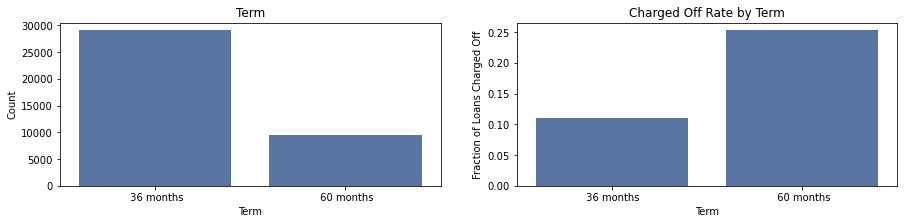

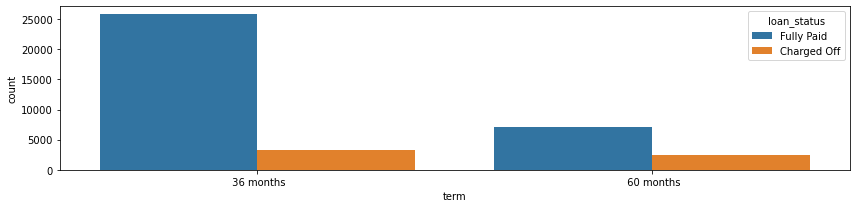

In [109]:
plot_var('term', 'Term', continuous=False)

### Clearly indincating the presence of outliers.
- So, Removing them.
- Let's see the quantile info and take an appropriate action.
- The values after 95 percentile seems to be disconected from the general distribution and also there is huge increase in the value for small quantile variation.
- So, considering threshold for removing outliers as 0.95

In [110]:
quantile_info = loan.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.500    59000.000
0.750    82000.000
0.900   115000.000
0.950   140004.000
0.970   165000.000
0.980   187000.000
0.990   234000.000
Name: annual_inc, dtype: float64

In [111]:
per_95_annual_inc = loan['annual_inc'].quantile(0.95)
loan_data = loan[loan.annual_inc <= per_95_annual_inc]

<AxesSubplot:xlabel='annual_inc'>

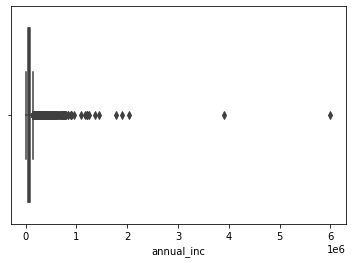

In [116]:
#plot_var('annual_inc', 'Annual income', continuous=True)
sea.boxplot(loan.annual_inc)

### Now the "annual_inc" data looks good and proceeding next.
Let's analyze other numerical variables which could possibly have outliers.
dti
loan_amnt
funded_amnt_inv

<AxesSubplot:xlabel='dti'>

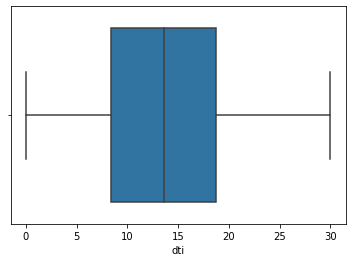

In [117]:
sea.boxplot(loan_data.dti)

<AxesSubplot:xlabel='loan_amnt'>

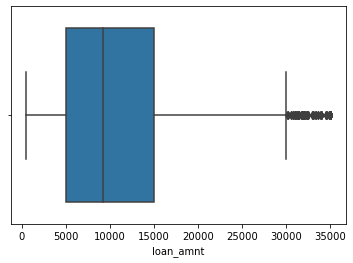

In [118]:
sea.boxplot(loan_data.loan_amnt)

In [119]:
loan.loan_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750   15000.000
0.900   21600.000
0.950   25000.000
0.970   28000.000
0.975   30000.000
0.980   30000.000
0.990   35000.000
1.000   35000.000
Name: loan_amnt, dtype: float64

<AxesSubplot:xlabel='funded_amnt_inv'>

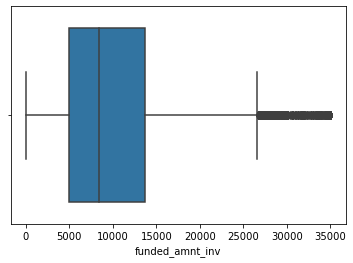

In [120]:
sea.boxplot(loan_data.funded_amnt_inv)

In [121]:
loan.funded_amnt_inv.quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98,0.985, 0.99, 1.0])

0.500    8750.000
0.750   14000.000
0.900   19975.000
0.950   24506.582
0.970   25828.061
0.975   27975.000
0.980   29890.415
0.985   30000.000
0.990   34721.583
1.000   35000.000
Name: funded_amnt_inv, dtype: float64

## Visualizing Categorical Data
- Already have grade column, extracting only subgrade (int level value) from the sub_grade variable
- Analyzing and visualizing only the defaulter data. So subsetting the data while plotting only for 'Charged Off' loan_status for below plots

<AxesSubplot:xlabel='loan_status', ylabel='count'>

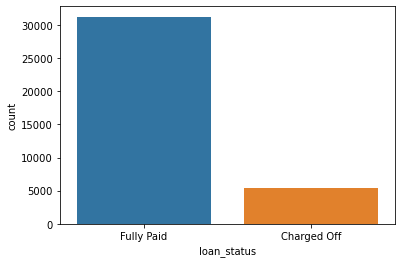

In [122]:
sea.countplot(x = 'loan_status', data = loan_data)

In [123]:
loan.sub_grade = pd.to_numeric(loan.sub_grade.apply(lambda x : x[-1]))
loan.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

<AxesSubplot:xlabel='grade', ylabel='count'>

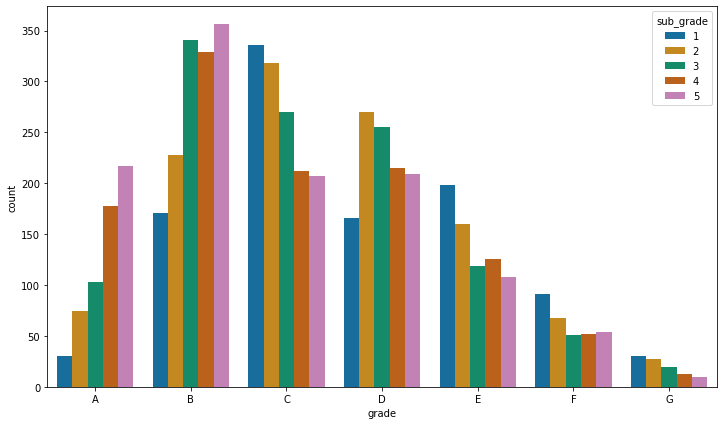

In [124]:
fig, ax = plt.subplots(figsize=(12,7))
sea.set_palette('colorblind')
sea.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan[loan.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='grade', ylabel='count'>

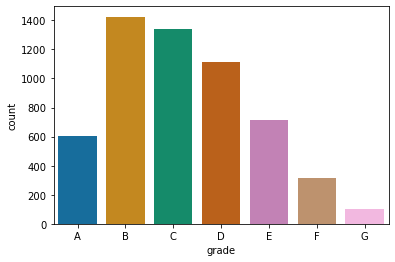

In [126]:
sea.countplot(x = 'grade', data = loan[loan.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

### Analyzing home_ownership

In [127]:
#checking unique values for home_ownership
loan['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [135]:
loan[loan.home_ownership== 'NONE']

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
39318,10000,1228.060,36 months,7.750,312.220,A,3,5,NONE,22200.000,Not Verified,Jan-08,Fully Paid,debt_consolidation,5.240,Apr-94,0,9,0,8.700,22
39659,4000,1925.000,36 months,9.640,128.410,B,4,0,NONE,100000.000,Not Verified,Aug-07,Fully Paid,other,15.000,May-99,1,6,0,14.900,8
39660,2800,1625.000,36 months,8.700,88.650,B,1,0,NONE,120000.000,Not Verified,Aug-07,Fully Paid,other,15.000,May-99,1,6,0,14.900,8


#### There are only 3 records with 'NONE' value in the data. So replacing the value with 'OTHER'

In [136]:
#replacing 'NONE' with 'OTHERS'
loan['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

In [137]:
#checking unique values for home_ownership again
loan['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

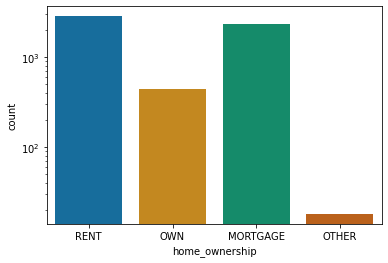

In [138]:
fig, ax = plt.subplots(figsize = (6,4))
ax.set(yscale = 'log')
sea.countplot(x='home_ownership', data=loan[loan['loan_status']=='Charged Off'])

#### Analyzing purpose

<AxesSubplot:xlabel='count', ylabel='purpose'>

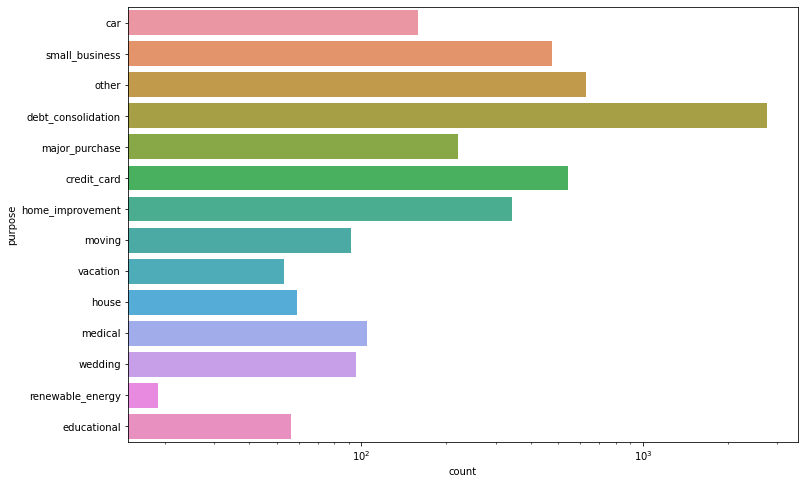

In [139]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
sea.countplot(y ='purpose', data=loan[loan.loan_status == 'Charged Off'])

#### Creating bins for some numerical variable to make them categorical

In [140]:
#creating bins for int_rate,open_acc,revol_util,total_acc
loan['int_rate_groups'] = pd.cut(loan['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
loan['open_acc_groups'] = pd.cut(loan['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
loan['revol_util_groups'] = pd.cut(loan['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
loan['total_acc_groups'] = pd.cut(loan['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
loan['annual_inc_groups'] = pd.cut(loan['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

In [141]:
# Viewing new bins created
loan.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups
0,5000,4975.000,36 months,10.650,162.870,B,2,10,RENT,24000.000,Verified,Dec-11,Fully Paid,credit_card,27.650,Jan-85,1,3,0,83.700,9,9%-13%,2-10,80-100,2-20,3k-31k
1,2500,2500.000,60 months,15.270,59.830,C,4,0,RENT,30000.000,Source Verified,Dec-11,Charged Off,car,1.000,Apr-99,5,3,0,9.400,4,13%-17%,2-10,0-20,2-20,3k-31k
2,2400,2400.000,36 months,15.960,84.330,C,5,10,RENT,12252.000,Not Verified,Dec-11,Fully Paid,small_business,8.720,Nov-01,2,2,0,98.500,10,13%-17%,2-10,80-100,2-20,3k-31k
3,10000,10000.000,36 months,13.490,339.310,C,1,10,RENT,49200.000,Source Verified,Dec-11,Fully Paid,other,20.000,Feb-96,1,10,0,21.000,37,13%-17%,2-10,20-40,20-37,3k-31k
5,5000,5000.000,36 months,7.900,156.460,A,4,3,RENT,36000.000,Source Verified,Dec-11,Fully Paid,wedding,11.200,Nov-04,3,9,0,28.300,12,5%-9%,2-10,20-40,2-20,3k-31k


#### Analyzing interest rate wrt the interest rate bins created

<AxesSubplot:xlabel='emp_length', ylabel='count'>

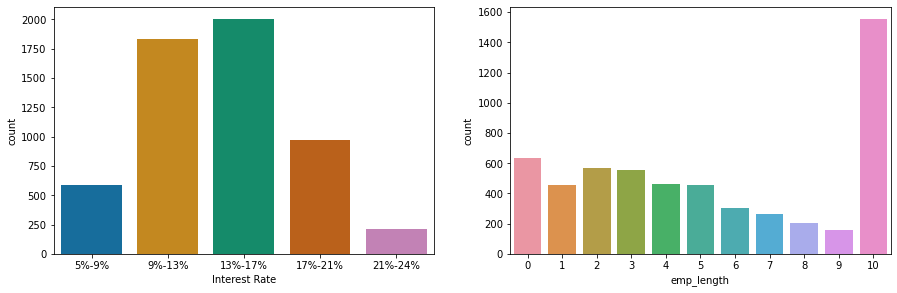

In [142]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sea.countplot(x='int_rate_groups', data=loan[loan.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')
plt.subplot(222)
sea.countplot(x='emp_length', data=loan[loan.loan_status == 'Charged Off'])

#### Similarly analyzing open_acc,revol_util,total_acc,annual_inc

<AxesSubplot:xlabel='open_acc_groups', ylabel='count'>

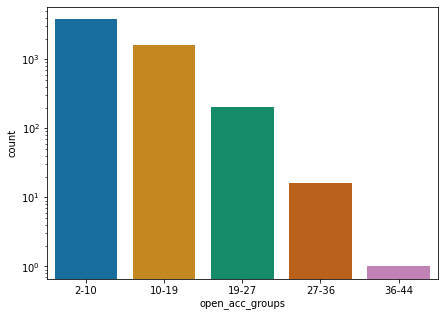

In [143]:
fig, ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sea.countplot(x='open_acc_groups', data=loan[loan.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='revol_util_groups', ylabel='count'>

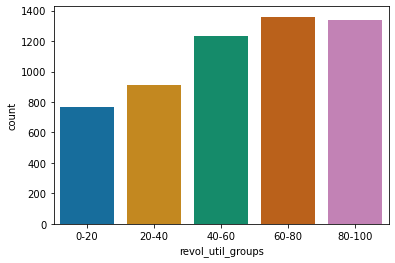

In [144]:
sns.countplot(x='revol_util_groups', data=loan[loan.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='total_acc_groups', ylabel='count'>

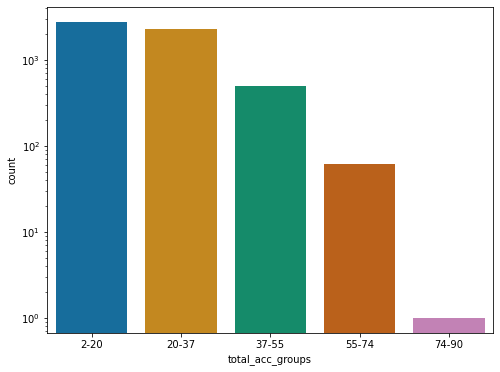

In [145]:
fig, ax = plt.subplots(figsize = (8,6))
ax.set_yscale('log')
sea.countplot(x='total_acc_groups', data=loan[loan.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='annual_inc_groups', ylabel='count'>

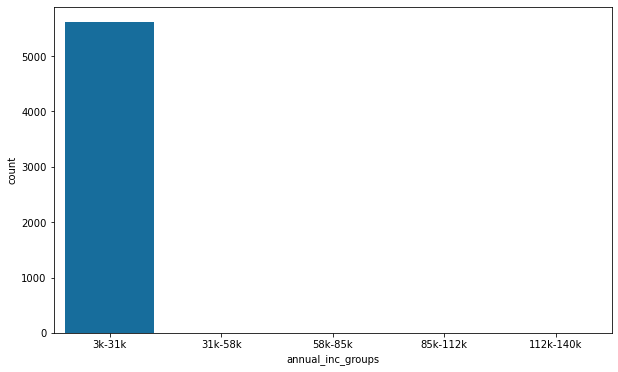

In [146]:
fig, ax = plt.subplots(figsize = (10,6))
sea.countplot(x='annual_inc_groups', data=loan[loan.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='count', ylabel='term'>

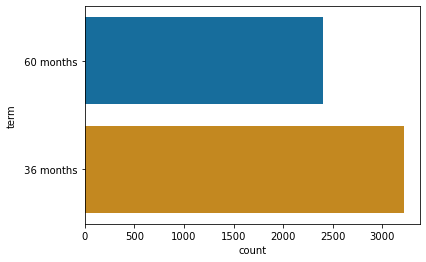

In [147]:
sea.countplot(y='term', data=loan[loan['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='verification_status', ylabel='count'>

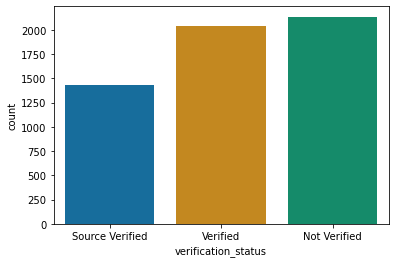

In [148]:
sea.countplot(x='verification_status', data=loan[loan['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='inq_last_6mths', ylabel='count'>

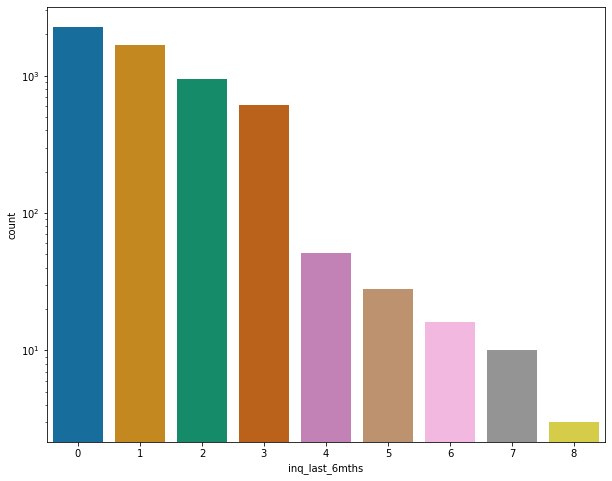

In [149]:
fig,ax = plt.subplots(figsize = (10,8))
ax.set_yscale('log')
sea.countplot(x='inq_last_6mths', data=loan[loan['loan_status']=='Charged Off'])

#### Analyzing by issued month and year

In [150]:
## Extracting month and year
df_month_year = loan['issue_d'].str.partition("-", True)     
loan['issue_month']=df_month_year[0]                       
loan['issue_year']='20' + df_month_year[2]

In [151]:
loan.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups,issue_month,issue_year
0,5000,4975.000,36 months,10.650,162.870,B,2,10,RENT,24000.000,Verified,Dec-11,Fully Paid,credit_card,27.650,Jan-85,1,3,0,83.700,9,9%-13%,2-10,80-100,2-20,3k-31k,Dec,2011
1,2500,2500.000,60 months,15.270,59.830,C,4,0,RENT,30000.000,Source Verified,Dec-11,Charged Off,car,1.000,Apr-99,5,3,0,9.400,4,13%-17%,2-10,0-20,2-20,3k-31k,Dec,2011
2,2400,2400.000,36 months,15.960,84.330,C,5,10,RENT,12252.000,Not Verified,Dec-11,Fully Paid,small_business,8.720,Nov-01,2,2,0,98.500,10,13%-17%,2-10,80-100,2-20,3k-31k,Dec,2011
3,10000,10000.000,36 months,13.490,339.310,C,1,10,RENT,49200.000,Source Verified,Dec-11,Fully Paid,other,20.000,Feb-96,1,10,0,21.000,37,13%-17%,2-10,20-40,20-37,3k-31k,Dec,2011
5,5000,5000.000,36 months,7.900,156.460,A,4,3,RENT,36000.000,Source Verified,Dec-11,Fully Paid,wedding,11.200,Nov-04,3,9,0,28.300,12,5%-9%,2-10,20-40,2-20,3k-31k,Dec,2011


<AxesSubplot:xlabel='issue_year', ylabel='count'>

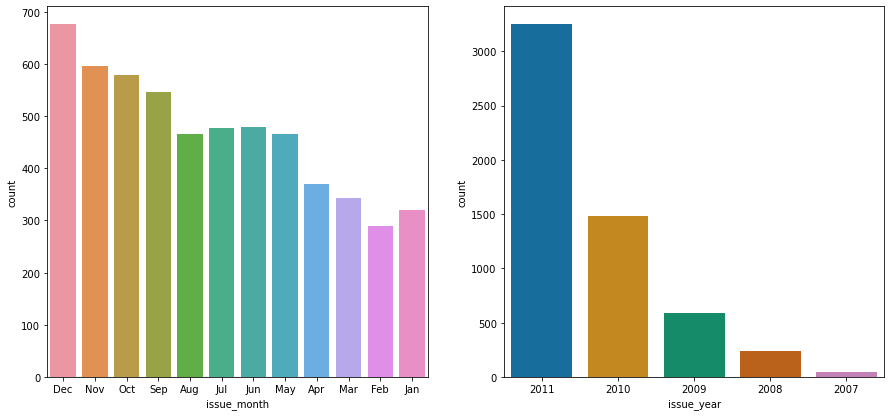

In [152]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sea.countplot(x='issue_month', data=loan[loan['loan_status']=='Charged Off'])
plt.subplot(222)
sea.countplot(x='issue_year', data=loan[loan['loan_status']=='Charged Off'])

### Maximum number of defaults occured when the loan was sanctioned/issued in Dec. Loan issued in the year 2011 were also as compared to other years

#### Analyzing installment,dti, loan_amnt

In [153]:
loan['installment_groups'] = pd.cut(loan['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
loan['funded_amnt_inv_group'] = pd.cut(loan['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) ## bin is starting from -35?
loan['loan_amnt_groups'] = pd.cut(loan['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan['dti_groups'] = pd.cut(loan['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

<AxesSubplot:xlabel='funded_amnt_inv_group', ylabel='count'>

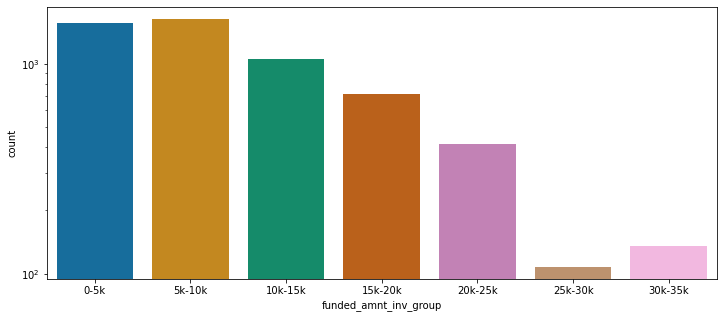

In [154]:
fig,ax = plt.subplots(figsize = (12,5))
ax.set_yscale('log')
sea.countplot(x='funded_amnt_inv_group', data=loan[loan['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='loan_amnt_groups', ylabel='count'>

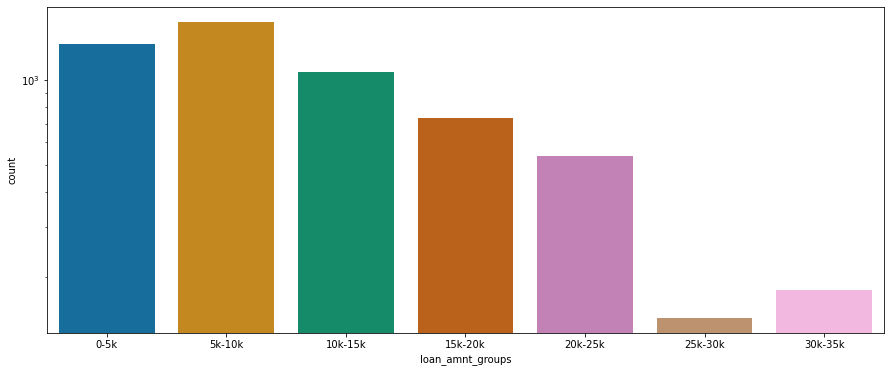

In [155]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sea.countplot(x='loan_amnt_groups', data=loan[loan['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='dti_groups', ylabel='count'>

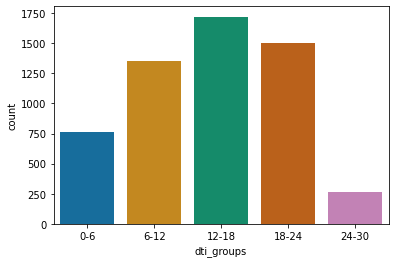

In [156]:
sea.countplot(x='dti_groups', data=loan[loan['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='installment_groups', ylabel='count'>

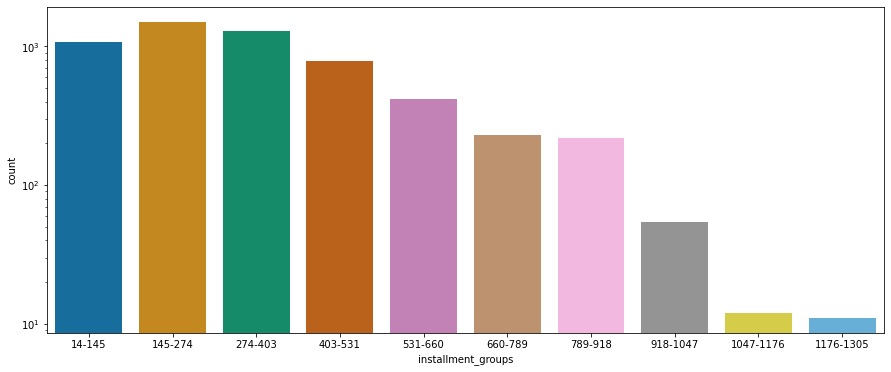

In [157]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sea.countplot(x='installment_groups', data=loan[loan['loan_status']=='Charged Off'])

### Observations
- The above analysis with respect to the charged off loans for each variable suggests the following. There is a more probability of defaulting when :
- Applicants having house_ownership as 'RENT'
- Applicants who use the loan to clear other debts
- Applicants who receive interest at the rate of 13-17%
- Applicants who have an income of range 31201 - 58402
- Applicants who have 20-37 open_acc
- Applicants with employement length of 10
- When funded amount by investor is between 5000-10000
- Loan amount is between 5429 - 10357
- Dti is between 12-18
- When monthly installments are between 145-274
- Term of 36 months
- When the loan status is Not verified
- When the no of enquiries in last 6 months is 0
- When the number of derogatory public records is 0
- When the purpose is 'debt_consolidation'
- Grade is 'B'
- And a total grade of 'B5' level.

### Also there is a very interesting observation from the date issued. The late months of an year indicated the high possibility of defaulting.

#### 1. Annual income vs loan purpose

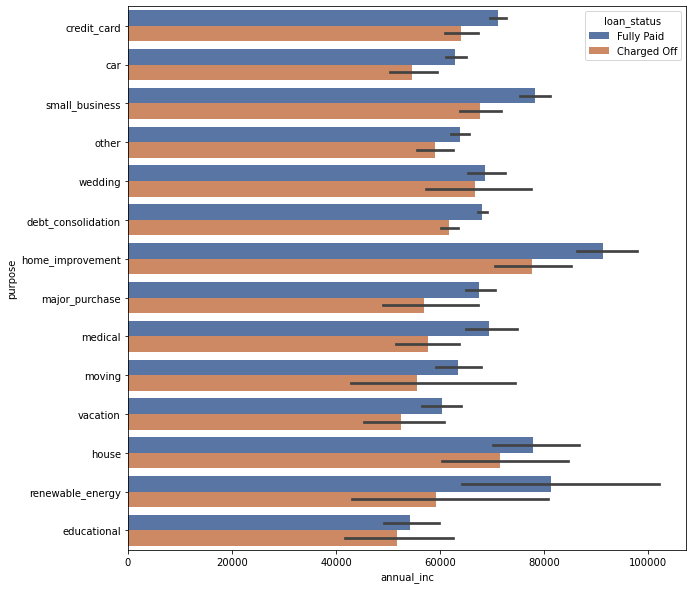

In [158]:
plt.figure(figsize=(10,10))
sea.barplot(data =loan,x='annual_inc', y='purpose', hue ='loan_status',palette="deep")
plt.show()

### Though the number of loans applied and defaulted are the highest in number for "debt_consolation", the annual income of those who applied isn't the highest.

#### Applicants with higher salary mostly applied loans for "home_improvment", "house", "renewable_energy" and "small_businesses"

#### 2.Annual income vs home ownership

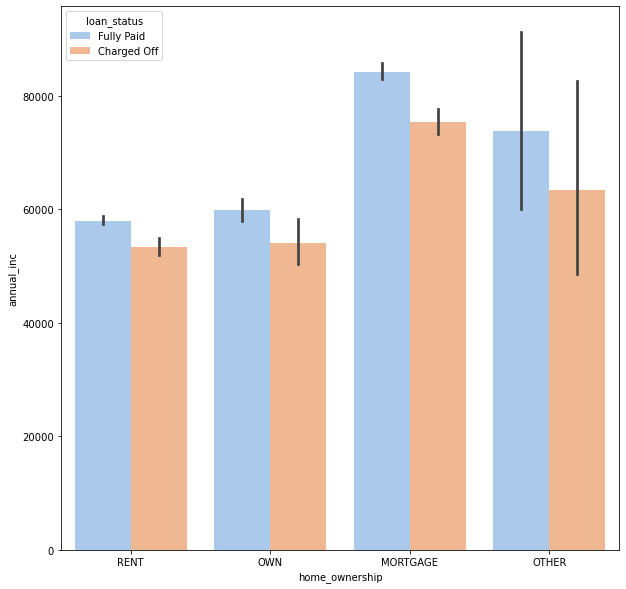

In [159]:
plt.figure(figsize=(10,10))
sea.barplot(data =loan,x='home_ownership', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

### Annual Income vs Loan amount

<AxesSubplot:xlabel='annual_inc_groups', ylabel='loan_amnt'>

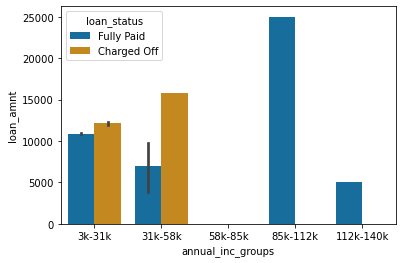

In [162]:
sea.barplot(x = "annual_inc_groups", y = "loan_amnt", hue = 'loan_status', data = loan)

### Across all the income groups, the loan_amount is higher for people who defaulted.

#### 3. Annual income vs int_rate

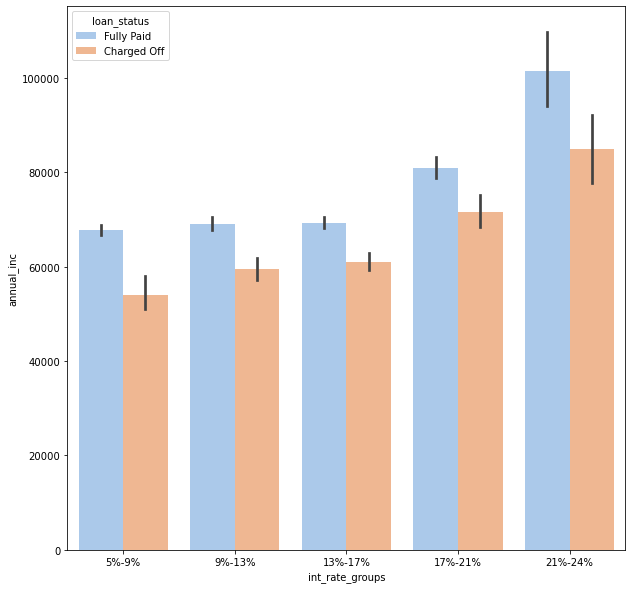

In [163]:
plt.figure(figsize=(10,10))
sea.barplot(data =loan,x='int_rate_groups', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

### Analysing loan_amount with other columns for more insights

#### 1.Loan Amount vs Interest Rate

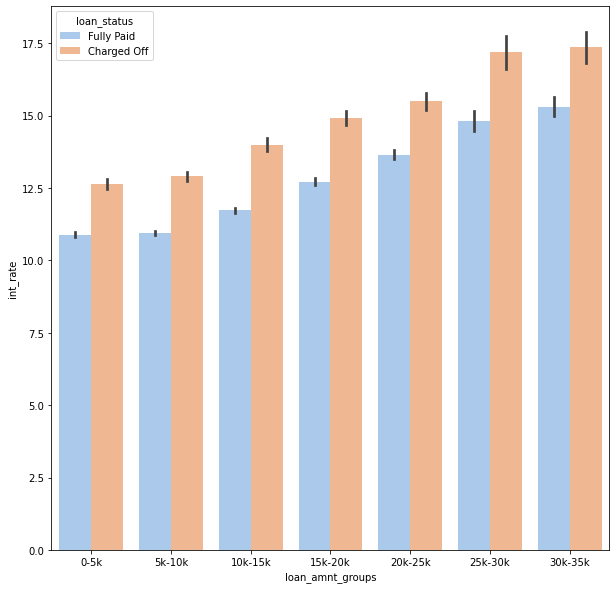

In [165]:
plt.figure(figsize=(10,10))
sea.barplot(data =loan,x='loan_amnt_groups', y='int_rate', hue ='loan_status',palette="pastel")
plt.show()

#### 2.Loan vs Loan purpose

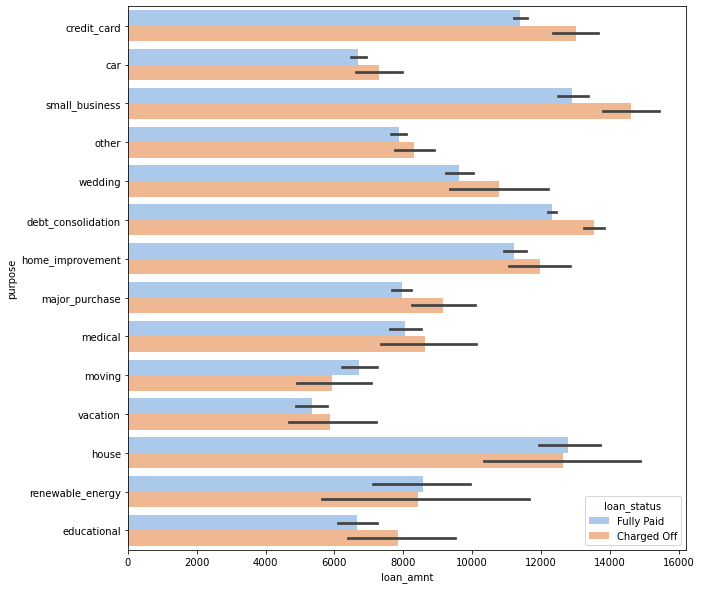

In [166]:
plt.figure(figsize=(10,10))
sea.barplot(data =loan,x='loan_amnt', y='purpose', hue ='loan_status',palette="pastel")
plt.show()

#### 3.Loan vs House Ownership

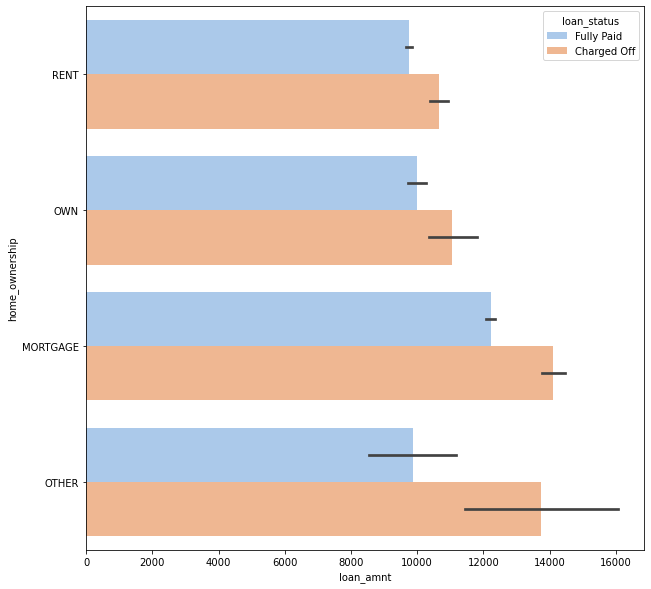

In [167]:
plt.figure(figsize=(10,10))
sea.barplot(data =loan,x='loan_amnt', y='home_ownership', hue ='loan_status',palette="pastel")
plt.show()

#### 4.Loan amount vs month issued and year issued

<AxesSubplot:xlabel='issue_year', ylabel='loan_amnt'>

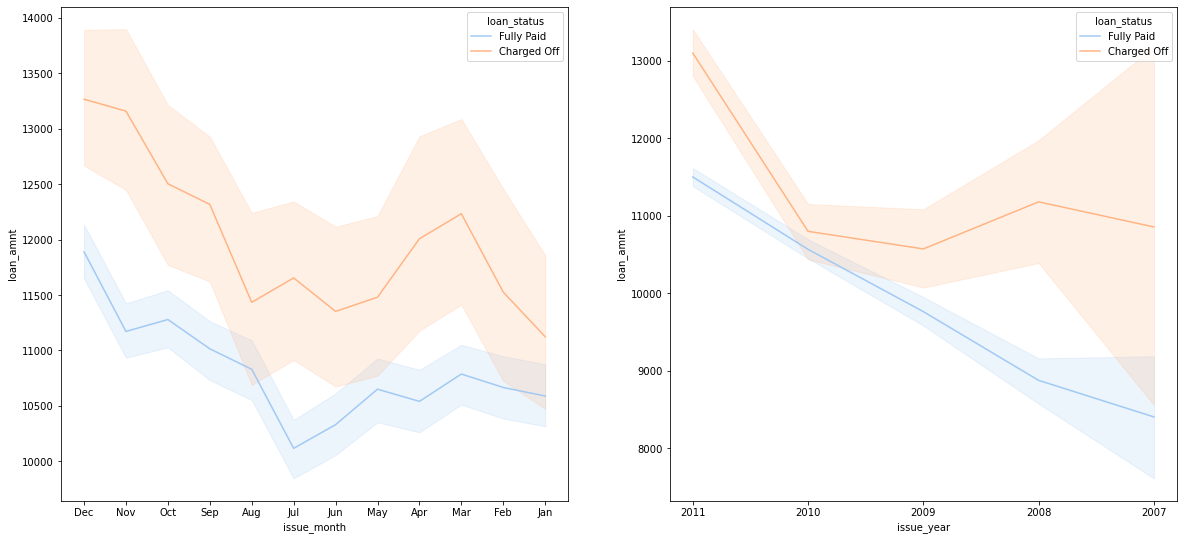

In [168]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sea.lineplot(data =loan,y='loan_amnt', x='issue_month', hue ='loan_status',palette="pastel")
plt.subplot(222)
sea.lineplot(data =loan,y='loan_amnt', x='issue_year', hue ='loan_status',palette="pastel")

#### 5.Loan amount vs Grade

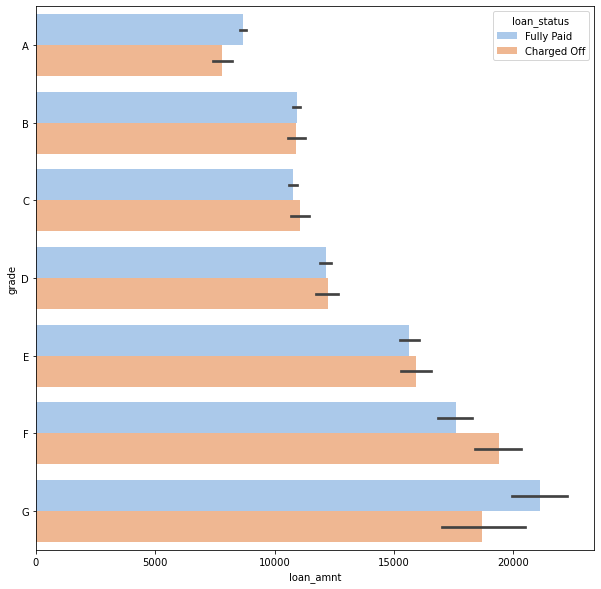

In [169]:
plt.figure(figsize=(10,10))
sea.barplot(data =loan,x='loan_amnt', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

<AxesSubplot:xlabel='verification_status', ylabel='loan_amnt'>

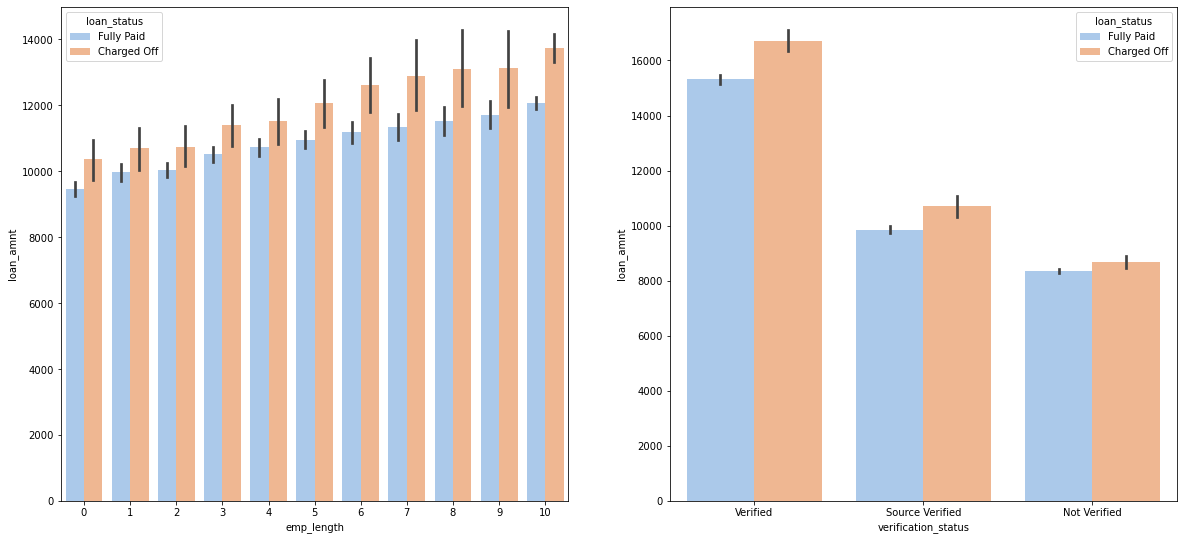

In [170]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sea.barplot(data =loan,y='loan_amnt', x='emp_length', hue ='loan_status',palette="pastel")
plt.subplot(222)
sea.barplot(data =loan,y='loan_amnt', x='verification_status', hue ='loan_status',palette="pastel")

### Employees with longer working history got the loan approved for a higher amount.
- Looking at the verification status data, verified loan applications tend to have higher loan amount. Which might indicate that the firms are first verifying the loans with higher values.

#### grade vs interest rate

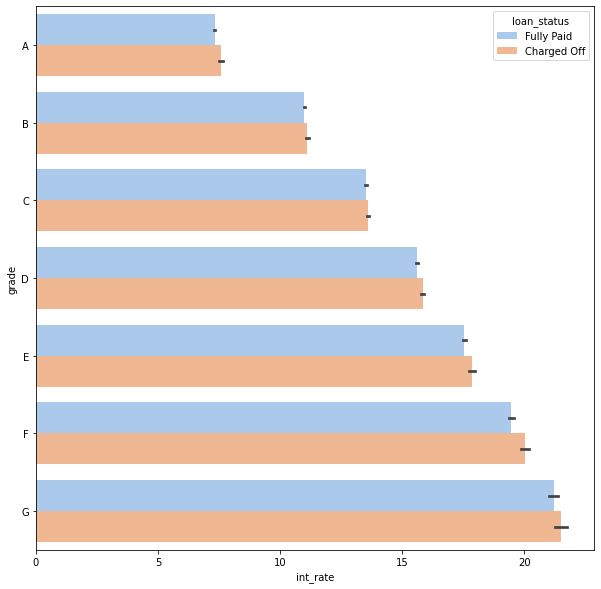

In [171]:
plt.figure(figsize=(10,10))
sea.barplot(data =loan,x='int_rate', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

<Figure size 432x288 with 0 Axes>

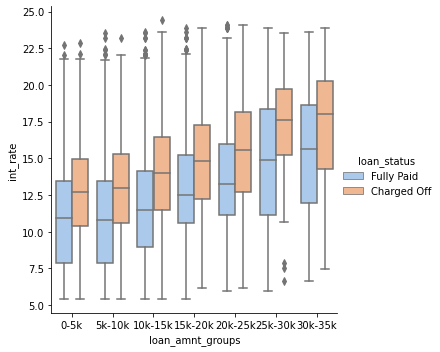

In [172]:
plt.tight_layout()
sea.catplot(data =loan,y ='int_rate', x ='loan_amnt_groups', hue ='loan_status',palette="pastel",kind = 'box')

### The interest rate for charged off loans is pretty high than that of fully paid loans in all the loan_amount groups.
- This can be a pretty strong driving factor for loan defaulting.

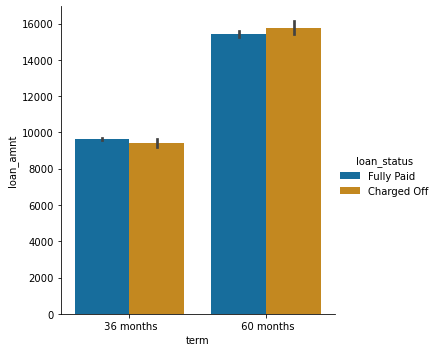

In [173]:
sea.catplot(x = 'term', y = 'loan_amnt', data = loan,hue = 'loan_status', kind = 'bar')

### Applicants who applied and defaulted have no significant difference in loan_amounts.
- Which means that applicants applying for long term has applied for more loan.

## Observations

### The above analysis with respect to the charged off loans. There is a more probability of defaulting when :
- Applicants taking loan for 'home improvement' and have income of 60k -70k
- Applicants whose home ownership is 'MORTGAGE and have income of 60-70k
- Applicants who receive interest at the rate of 21-24% and have an income of 70k-80k
- Applicants who have taken a loan in the range 30k - 35k and are charged interest rate of 15-17.5 %
- Applicants who have taken a loan for small business and the loan amount is greater than 14k
- Applicants whose home ownership is 'MORTGAGE and have loan of 14-16k
- When grade is F and loan amount is between 15k-20k
- When employment length is 10yrs and loan amount is 12k-14k
- When the loan is verified and loan amount is above 16k
- For grade G and interest rate above 20%

### Reference
- Machine Learning With Python book
- https://www.lendingclub.com
- https://pandas.pydata.org/
- https://numpy.org/
- https://seaborn.pydata.org/

 